In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# prompt: replace null in Life expectancy with mean in the column

# Calculate the mean of 'Life expectancy ' (note the space in the column name)
mean_life_expectancy = df['Life expectancy '].mean()

# Fill NaN values in 'Life expectancy ' with the calculated mean
df['Life expectancy '] = df['Life expectancy '].fillna(mean_life_expectancy)

In [ ]:
mean_Adult_Mortality = df['Adult Mortality'].mean()
df['Adult Mortality'] = df['Adult Mortality'].fillna(mean_Adult_Mortality)
mean_Alcohol = df['Alcohol'].mean()
df['Alcohol'] = df['Alcohol'].fillna(mean_Alcohol)
mean_Hepatitis_B = df['Hepatitis B'].mean()
df['Hepatitis B'] = df['Hepatitis B'].fillna(mean_Hepatitis_B)
mean_BMI = df[' BMI '].mean()
df[' BMI '] = df[' BMI '].fillna(mean_BMI)
mean_Polio = df['Polio'].mean()
df['Polio'] = df['Polio'].fillna(mean_Polio)
mean_Total_expenditure = df['Total expenditure'].mean()
df['Total expenditure'] = df['Total expenditure'].fillna(mean_Total_expenditure)
mean_Diphtheria = df['Diphtheria '].mean()
df['Diphtheria '] = df['Diphtheria '].fillna(mean_Diphtheria)
mean_GDP = df['GDP'].mean()
df['GDP'] = df['GDP'].fillna(mean_GDP)
mean_Population = df['Population'].mean()
df['Population'] = df['Population'].fillna(mean_Population)
mean_G = df['Income composition of resources'].mean()
df['Income composition of resources'] = df['Income composition of resources'].fillna(mean_G)
mean_F = df['Schooling'].mean()
df['Schooling'] = df['Schooling'].fillna(mean_F)

In [ ]:
mean_A= df[' thinness  1-19 years'].mean()
df[' thinness  1-19 years'] = df[' thinness  1-19 years'].fillna(mean_A)

In [ ]:
mean_B= df[' thinness 5-9 years'].mean()
df[' thinness 5-9 years'] = df[' thinness 5-9 years'].fillna(mean_B)

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


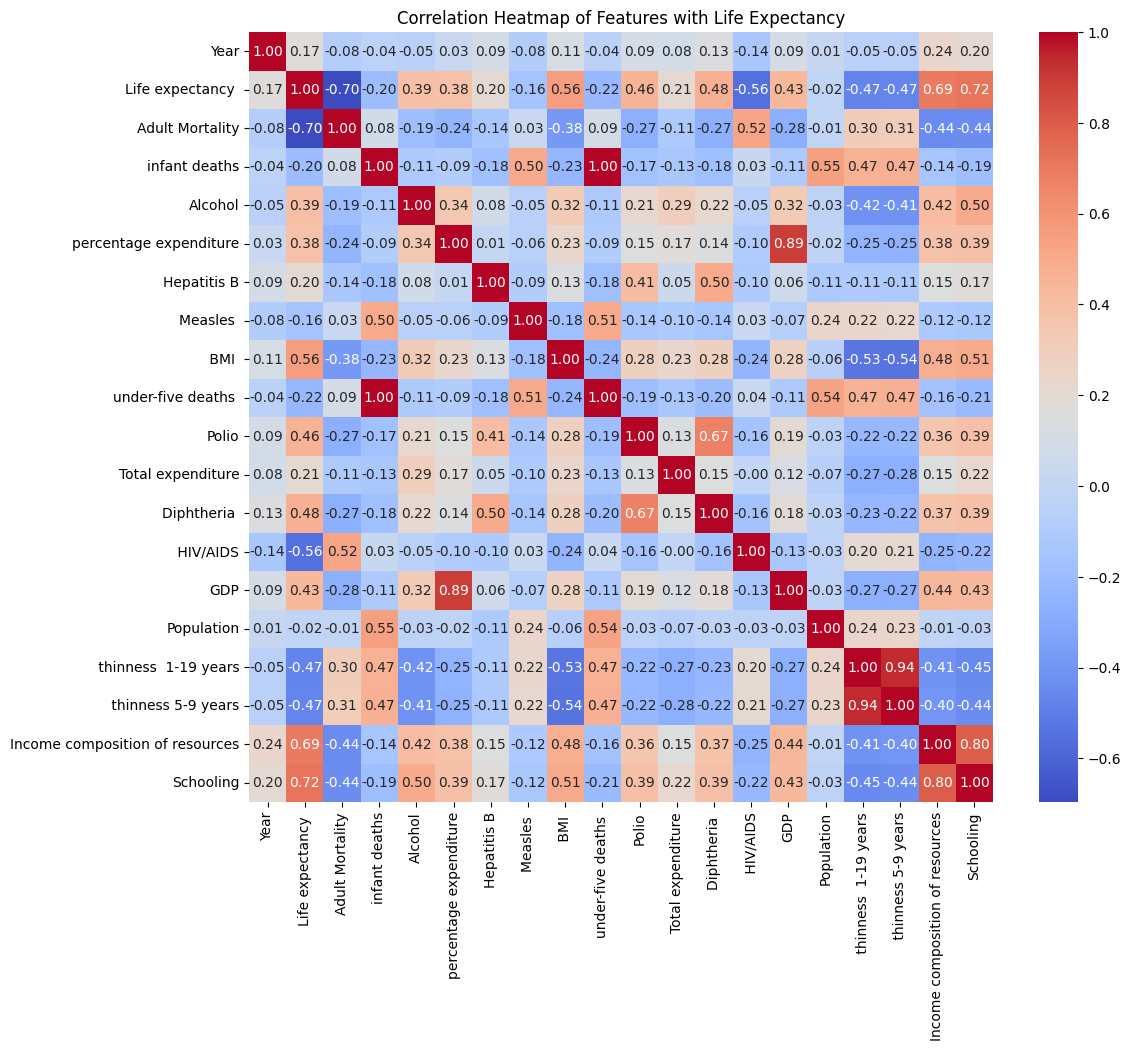

In [ ]:
# prompt: find heat map between all columns and Life expectancy column, leave country and Status column

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed as in the provided code

# Remove specified columns
df1 = df.drop(['Country', 'Status'], axis=1)

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features with Life Expectancy')
plt.show()

In [ ]:
X = df1[["Income composition of resources"]]
y = df1["Life expectancy "]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
r2_score( y_test, y_pred)

0.45535971131432984

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
2546    73.7  69.445627
650     75.9  74.294602
1740    74.2  73.601891
177     76.8  75.515092
1377    51.9  63.244216


In [ ]:
import pickle
with open('Linear regression- life expectancy.pynb','wb') as f:
    pickle.dump(lr,f)
with open('Linear regression- life expectancy.pynb', 'rb') as f:
    clf2 = pickle.load(f)